
- Split train/test
- Target based on EDA categoricals

- Evaluate the model

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [31]:
df_p = pd.read_csv('pumps.csv', index_col = 0)
df_py = pd.read_csv('pumps_y.csv', index_col = 0)

In [32]:
df_p.shape, df_py.shape

((59400, 39), (59400, 1))

In [33]:
#Merging pumps_y as a new column on pumps
df_p['status_group'] = df_py['status_group']

In [34]:
df_p.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [35]:
#Do train/test split
Xtrain, Xtest, ytrain, ytest = train_test_split(df_p.loc[:,'amount_tsh':'waterpoint_type_group'], df_p.loc[:,'status_group'], test_size = 0.2, random_state = 42)

In [36]:
#Check the sizes
Xtrain.shape, ytrain.shape

((47520, 39), (47520,))

In [37]:
#check the header to see if indexes match
Xtrain.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
454,50.0,2013-02-27,Dmdd,2092,DMDD,35.426020,-4.227446,Narmo,0,Internal,...,per bucket,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
510,0.0,2011-03-17,Cmsr,0,Gove,35.510074,-5.724555,Lukali,0,Internal,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
14146,0.0,2011-07-10,Kkkt,0,KKKT,32.499866,-9.081222,Mahakama,0,Lake Rukwa,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other
47410,0.0,2011-04-12,NaN,0,NaN,34.060484,-8.830208,Shule Ya Msingi Chosi A,0,Rufiji,...,monthly,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe
1288,300.0,2011-04-05,Ki,1023,Ki,37.032690,-6.040787,Kwa Mjowe,0,Wami / Ruvu,...,on failure,salty,salty,enough,enough,shallow well,shallow well,groundwater,other,other


In [38]:
ytrain.head()

id
454          functional
510          functional
14146    non functional
47410    non functional
1288     non functional
Name: status_group, dtype: object

In [39]:
#Merge the training data back together
df_p = pd.concat([Xtrain, ytrain], axis = 1)

In [40]:
df_p.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
454,50.0,2013-02-27,Dmdd,2092,DMDD,35.426020,-4.227446,Narmo,0,Internal,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
510,0.0,2011-03-17,Cmsr,0,Gove,35.510074,-5.724555,Lukali,0,Internal,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
14146,0.0,2011-07-10,Kkkt,0,KKKT,32.499866,-9.081222,Mahakama,0,Lake Rukwa,...,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional
47410,0.0,2011-04-12,NaN,0,NaN,34.060484,-8.830208,Shule Ya Msingi Chosi A,0,Rufiji,...,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,non functional
1288,300.0,2011-04-05,Ki,1023,Ki,37.032690,-6.040787,Kwa Mjowe,0,Wami / Ruvu,...,salty,salty,enough,enough,shallow well,shallow well,groundwater,other,other,non functional


In [41]:
#Missing Values
#Notice when you split train/test this has changed
df_p.isnull().sum() # number of missing values 

amount_tsh                   0
date_recorded                0
funder                    2876
gps_height                   0
installer                 2889
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 296
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2689
recorded_by                  0
scheme_management         3102
scheme_name              22523
permit                    2439
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

Remove scheme_name and date_recorded because scheme_name is mostly empty and date_recorded is something that cant be correlated

In [42]:
df_p = df_p.drop(['scheme_name', 'date_recorded'], axis=1)

In [43]:
df_p.head(3)

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
454,50.0,Dmdd,2092,DMDD,35.426020,-4.227446,Narmo,0,Internal,Bashnet Kati,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
510,0.0,Cmsr,0,Gove,35.510074,-5.724555,Lukali,0,Internal,Lukali,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
14146,0.0,Kkkt,0,KKKT,32.499866,-9.081222,Mahakama,0,Lake Rukwa,Chawalikozi,...,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional


In [44]:
#Split the dataframe into numeric and categorical

In [45]:
#Divide df into numeric and categorical

df_num = df_p[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year']]

In [46]:
#Categorical df

df_cat = df_p[['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group']]

In [47]:
#Check the NaNs - num
df_num.isnull().sum()

amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64

In [48]:
df_num.shape, df_cat.shape

((47520, 9), (47520, 29))

In [49]:
df_cat.nunique()

funder                    1698
installer                 1923
wpt_name                 30742
basin                        9
subvillage               17232
region                      21
lga                        125
ward                      2076
public_meeting               2
recorded_by                  1
scheme_management           12
permit                       2
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
status_group                 3
dtype: int64

In [50]:
#Fill all NaNs with 'no data'
df_cat_fillna = df_cat.fillna('not available')

In [51]:
df_cat_fillna.head()

,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
454,Dmdd,DMDD,Narmo,Internal,Bashnet Kati,Manyara,Babati,Bashinet,True,GeoData Consultants Ltd,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
510,Cmsr,Gove,Lukali,Internal,Lukali,Dodoma,Bahi,Lamaiti,True,GeoData Consultants Ltd,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
14146,Kkkt,KKKT,Mahakama,Lake Rukwa,Chawalikozi,Mbeya,Mbozi,Ndalambo,True,GeoData Consultants Ltd,...,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional
47410,not available,not available,Shule Ya Msingi Chosi A,Rufiji,Shuleni,Mbeya,Mbarali,Chimala,True,GeoData Consultants Ltd,...,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,non functional
1288,Ki,Ki,Kwa Mjowe,Wami / Ruvu,Ngholong,Morogoro,Kilosa,Chakwale,True,GeoData Consultants Ltd,...,salty,salty,enough,enough,shallow well,shallow well,groundwater,other,other,non functional


In [52]:
#Check NaNs in here
#Check the NaNs - num
df_cat_fillna.isnull().sum()

funder                   0
installer                0
wpt_name                 0
basin                    0
subvillage               0
region                   0
lga                      0
ward                     0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
status_group             0
dtype: int64

In [53]:
#Dummify the target
dummy_target_var = pd.get_dummies(df_cat_fillna['status_group'])

In [54]:
#Check the dummy df and NORMALLY remove the redundant variable. I will not here...
dummy_target_var.head()

,functional,functional needs repair,non functional
id,,,
454,1,0,0
510,1,0,0
14146,0,0,1
47410,0,0,1
1288,0,0,1


In [55]:
#Concat original cat df and dummified target

df_cat_fillna_dummy_target = pd.concat([df_cat_fillna, dummy_target_var], axis = 1)
df_cat_fillna_dummy_target.head(3)

,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,...,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,functional,functional needs repair,non functional
id,,,,,,,,,,,,,,,,,,,,,
454,Dmdd,DMDD,Narmo,Internal,Bashnet Kati,Manyara,Babati,Bashinet,True,GeoData Consultants Ltd,...,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional,1,0,0
510,Cmsr,Gove,Lukali,Internal,Lukali,Dodoma,Bahi,Lamaiti,True,GeoData Consultants Ltd,...,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,1,0,0
14146,Kkkt,KKKT,Mahakama,Lake Rukwa,Chawalikozi,Mbeya,Mbozi,Ndalambo,True,GeoData Consultants Ltd,...,enough,shallow well,shallow well,groundwater,other,other,non functional,0,0,1


In [56]:
#Target Encoding a Subset of columns

column_list_to_target_encode = ['basin','extraction_type_class','region','public_meeting','scheme_management','permit','management_group','extraction_type_class' ,'payment_type', 'quality_group', 'quantity_group',
                               'source_class', 'waterpoint_type_group']
for column in column_list_to_target_encode:
    target_means = df_cat_fillna_dummy_target.groupby(column).mean()
    df_cat_fillna_dummy_target[f'{column}_func'] = df_cat_fillna_dummy_target[column].replace(target_means['functional'])
    df_cat_fillna_dummy_target[f'{column}_nonfunc'] = df_cat_fillna_dummy_target[column].replace(target_means['non functional'])
    df_cat_fillna_dummy_target[f'{column}_nr'] = df_cat_fillna_dummy_target[column].replace(target_means['functional needs repair'])
#df['cat_nonf'] = df['cat'].replace(target_means['nonf'])
df_cat_fillna_dummy_target.head()

,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,...,quality_group_nr,quantity_group_func,quantity_group_nonfunc,quantity_group_nr,source_class_func,source_class_nonfunc,source_class_nr,waterpoint_type_group_func,waterpoint_type_group_nonfunc,waterpoint_type_group_nr
id,,,,,,,,,,,,,,,,,,,,,
454,Dmdd,DMDD,Narmo,Internal,Bashnet Kati,Manyara,Babati,Bashinet,True,GeoData Consultants Ltd,...,0.077129,0.524537,0.379627,0.095836,0.543124,0.396647,0.060229,0.577404,0.339163,0.083433
510,Cmsr,Gove,Lukali,Internal,Lukali,Dodoma,Bahi,Lamaiti,True,GeoData Consultants Ltd,...,0.077129,0.652461,0.274700,0.072839,0.543124,0.396647,0.060229,0.615505,0.324167,0.060328
14146,Kkkt,KKKT,Mahakama,Lake Rukwa,Chawalikozi,Mbeya,Mbozi,Ndalambo,True,GeoData Consultants Ltd,...,0.077129,0.652461,0.274700,0.072839,0.543124,0.396647,0.060229,0.132013,0.821499,0.046489
47410,not available,not available,Shule Ya Msingi Chosi A,Rufiji,Shuleni,Mbeya,Mbarali,Chimala,True,GeoData Consultants Ltd,...,0.077129,0.524537,0.379627,0.095836,0.541889,0.340276,0.117835,0.577404,0.339163,0.083433
1288,Ki,Ki,Kwa Mjowe,Wami / Ruvu,Ngholong,Morogoro,Kilosa,Chakwale,True,GeoData Consultants Ltd,...,0.057752,0.652461,0.274700,0.072839,0.543124,0.396647,0.060229,0.132013,0.821499,0.046489


In [57]:
#Check the shape
df_cat_fillna_dummy_target.shape

(47520, 68)

In [58]:
#Check the column string to make sure that everything is there
df_cat_fillna_dummy_target.columns
#['basin','permit', 'extraction_type_class', 'management_group', 
#                                                       'payment_type', 'quality_group', 'quantity_group', 'source_class', 
#                                                       'waterpoint_type_group']

Index(['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region',
       'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management',
       'permit', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'status_group',
       'functional', 'functional needs repair', 'non functional', 'basin_func',
       'basin_nonfunc', 'basin_nr', 'extraction_type_class_func',
       'extraction_type_class_nonfunc', 'extraction_type_class_nr',
       'region_func', 'region_nonfunc', 'region_nr', 'public_meeting_func',
       'public_meeting_nonfunc', 'public_meeting_nr', 'scheme_management_func',
       'scheme_management_nonfunc', 'scheme_management_nr', 'permit_func',
       'permit_nonfunc', 'permit_nr', 'management_group_func',
 

In [29]:
#Check heads and tails before merging
#df_num.head(20)

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,,,,,,,,,
454,50.0,2092,35.426020,-4.227446e+00,0,21,1,160,1998
510,0.0,0,35.510074,-5.724555e+00,0,1,6,0,0
14146,0.0,0,32.499866,-9.081222e+00,0,12,6,0,0
47410,0.0,0,34.060484,-8.830208e+00,0,12,7,0,0
1288,300.0,1023,37.032690,-6.040787e+00,0,5,1,120,1997
13095,0.0,0,33.509112,-2.648505e+00,0,19,2,0,0
558,0.0,0,33.731347,-3.284633e+00,0,17,2,0,0
35626,0.0,298,36.864072,-7.935517e+00,0,5,3,250,2009
8696,0.0,0,33.423658,-2.606991e+00,0,19,2,0,0


In [115]:
#df_num.tail(3)

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,,,,,,,,,
35778,0.0,-13,38.974416,-5.420823,0,4,5,1000,2005
49444,0.0,0,34.316586,-3.107161,0,17,6,0,0
23812,0.0,1290,37.626401,-3.211457,0,3,1,1,1976


In [116]:
#df_cat_fillna_dummy_target.head(3)

,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,...,quality_group_nr,quantity_group_func,quantity_group_nonfunc,quantity_group_nr,source_class_func,source_class_nonfunc,source_class_nr,waterpoint_type_group_func,waterpoint_type_group_nonfunc,waterpoint_type_group_nr
id,,,,,,,,,,,,,,,,,,,,,
454,Dmdd,DMDD,Narmo,Internal,Bashnet Kati,Manyara,Babati,Bashinet,True,GeoData Consultants Ltd,...,0.077129,0.524537,0.379627,0.095836,0.543124,0.396647,0.060229,0.577404,0.339163,0.083433
510,Cmsr,Gove,Lukali,Internal,Lukali,Dodoma,Bahi,Lamaiti,True,GeoData Consultants Ltd,...,0.077129,0.652461,0.274700,0.072839,0.543124,0.396647,0.060229,0.615505,0.324167,0.060328
14146,Kkkt,KKKT,Mahakama,Lake Rukwa,Chawalikozi,Mbeya,Mbozi,Ndalambo,True,GeoData Consultants Ltd,...,0.077129,0.652461,0.274700,0.072839,0.543124,0.396647,0.060229,0.132013,0.821499,0.046489


In [117]:
#df_cat_fillna_dummy_target.tail(3)

,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,...,quality_group_nr,quantity_group_func,quantity_group_nonfunc,quantity_group_nr,source_class_func,source_class_nonfunc,source_class_nr,waterpoint_type_group_func,waterpoint_type_group_nonfunc,waterpoint_type_group_nr
id,,,,,,,,,,,,,,,,,,,,,
35778,Omar Ally,Omar Ally,Kwa Omar Ally,Pangani,Sokoni,Tanga,Pangani,Pangani Mashariki,False,GeoData Consultants Ltd,...,0.077129,0.524537,0.379627,0.095836,0.543124,0.396647,0.060229,0.132013,0.821499,0.046489
49444,Rwssp,WEDECO,Muungano,Lake Victoria,Ijosho,Shinyanga,Meatu,Sakasaka,True,GeoData Consultants Ltd,...,0.077129,0.652461,0.274700,0.072839,0.543124,0.396647,0.060229,0.615505,0.324167,0.060328
23812,Government Of Tanzania,District council,Kwa Nicholaus Kimario,Pangani,Kwandele,Kilimanjaro,Rombo,Shimbi,True,GeoData Consultants Ltd,...,0.077129,0.652461,0.274700,0.072839,0.543124,0.396647,0.060229,0.577404,0.339163,0.083433


In [59]:
#DO NOT merge with numerical df, just assign it to the new df
num_dumm_cat = df_cat_fillna_dummy_target

In [60]:
num_dumm_cat.head()

,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,...,quality_group_nr,quantity_group_func,quantity_group_nonfunc,quantity_group_nr,source_class_func,source_class_nonfunc,source_class_nr,waterpoint_type_group_func,waterpoint_type_group_nonfunc,waterpoint_type_group_nr
id,,,,,,,,,,,,,,,,,,,,,
454,Dmdd,DMDD,Narmo,Internal,Bashnet Kati,Manyara,Babati,Bashinet,True,GeoData Consultants Ltd,...,0.077129,0.524537,0.379627,0.095836,0.543124,0.396647,0.060229,0.577404,0.339163,0.083433
510,Cmsr,Gove,Lukali,Internal,Lukali,Dodoma,Bahi,Lamaiti,True,GeoData Consultants Ltd,...,0.077129,0.652461,0.274700,0.072839,0.543124,0.396647,0.060229,0.615505,0.324167,0.060328
14146,Kkkt,KKKT,Mahakama,Lake Rukwa,Chawalikozi,Mbeya,Mbozi,Ndalambo,True,GeoData Consultants Ltd,...,0.077129,0.652461,0.274700,0.072839,0.543124,0.396647,0.060229,0.132013,0.821499,0.046489
47410,not available,not available,Shule Ya Msingi Chosi A,Rufiji,Shuleni,Mbeya,Mbarali,Chimala,True,GeoData Consultants Ltd,...,0.077129,0.524537,0.379627,0.095836,0.541889,0.340276,0.117835,0.577404,0.339163,0.083433
1288,Ki,Ki,Kwa Mjowe,Wami / Ruvu,Ngholong,Morogoro,Kilosa,Chakwale,True,GeoData Consultants Ltd,...,0.057752,0.652461,0.274700,0.072839,0.543124,0.396647,0.060229,0.132013,0.821499,0.046489


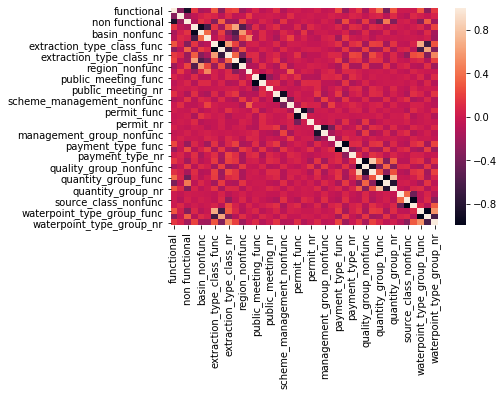

In [61]:
#Corr heatmap
sns.heatmap(num_dumm_cat.corr())

In [64]:
num_dumm_cat.columns

Index(['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region',
       'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management',
       'permit', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'status_group',
       'functional', 'functional needs repair', 'non functional', 'basin_func',
       'basin_nonfunc', 'basin_nr', 'extraction_type_class_func',
       'extraction_type_class_nonfunc', 'extraction_type_class_nr',
       'region_func', 'region_nonfunc', 'region_nr', 'public_meeting_func',
       'public_meeting_nonfunc', 'public_meeting_nr', 'scheme_management_func',
       'scheme_management_nonfunc', 'scheme_management_nr', 'permit_func',
       'permit_nonfunc', 'permit_nr', 'management_group_func',
 

In [65]:
# List comprehension for picking training data sets

column_list_to_target_encode = ['basin','extraction_type_class','region','public_meeting','scheme_management','permit','management_group','extraction_type_class' ,'payment_type', 'quality_group', 'quantity_group',
                               'source_class', 'waterpoint_type_group']

#num_list =['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 
 #          'region_code', 'district_code', 'population', 'construction_year']

#for functionals
s_func = '_func'
s_nonfunc = '_nonfunc'
s_nr = '_nr'
func_list = [x + s_func for x in column_list_to_target_encode]
nonfunc_list = [x + s_nonfunc for x in column_list_to_target_encode]
repair_list = [x + s_nr for x in column_list_to_target_encode]
#func_list.extend(num_list)
#nonfunc_list.extend(num_list)
#repair_list.extend(num_list)
print(func_list, nonfunc_list)

['basin_func', 'extraction_type_class_func', 'region_func', 'public_meeting_func', 'scheme_management_func', 'permit_func', 'management_group_func', 'extraction_type_class_func', 'payment_type_func', 'quality_group_func', 'quantity_group_func', 'source_class_func', 'waterpoint_type_group_func'] ['basin_nonfunc', 'extraction_type_class_nonfunc', 'region_nonfunc', 'public_meeting_nonfunc', 'scheme_management_nonfunc', 'permit_nonfunc', 'management_group_nonfunc', 'extraction_type_class_nonfunc', 'payment_type_nonfunc', 'quality_group_nonfunc', 'quantity_group_nonfunc', 'source_class_nonfunc', 'waterpoint_type_group_nonfunc']


In [66]:
#Define data and train sets
X_func = num_dumm_cat.loc[:,func_list]
X_nonfunc = num_dumm_cat.loc[:,nonfunc_list]
X_repair = num_dumm_cat.loc[:,repair_list]
y_func = num_dumm_cat.loc[:, 'functional']
y_nonfunc = num_dumm_cat.loc[:, 'non functional']
y_repair = num_dumm_cat.loc[:, 'functional needs repair']

In [67]:
#Check shapes
X_func.shape, y_func.shape

((47520, 13), (47520,))

In [68]:
m_f = LogisticRegression(C=1e5, solver = 'lbfgs') # C is a hyperparameter (regularization, W03)
m_nf = LogisticRegression(C=1e5, solver = 'lbfgs') # C is a hyperparameter (regularization, W03)
m_r = LogisticRegression(C=1e5, solver = 'lbfgs') # C is a hyperparameter (regularization, W03)

m_f.fit(X_func, y_func) # find the best model parameters for this data functional pumps
m_nf.fit(X_nonfunc, y_nonfunc) # best model params for non_functional
m_r.fit(X_repair, y_repair) # best model params for repair needing pumps

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [69]:
print('Score for functional pump prediction is', m_f.score(X_func,y_func)) # calculates the accuracy (% of correct points) for non_func
print('Score for functional but repair needing pump prediction is', m_r.score(X_repair,y_repair))
print('Score for nonfunctional pump prediction is', m_nf.score(X_nonfunc,y_nonfunc))

Score for functional pump prediction is 0.7104587542087543
Score for functional but repair needing pump prediction is 0.9269991582491582
Score for nonfunctional pump prediction is 0.7701809764309764
